# Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II
Objective: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.



In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.feature_selection as chi2
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv ('/Users/biruk/Documents/Ironhack/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv', index_col='uid')

In [33]:
df

,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
uid,,,,,,,,
1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...
2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing


In [36]:
# Part 1: Analyzing Best-Seller Trends Across Product Categories

In [38]:
# Objective: Understand the relationship between product categories and their best-seller status.

## 1. Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

In [42]:
joined = pd.crosstab(index = df.category,columns = df.isBestSeller)
joined

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


Are there categories where being a best-seller is more prevalent?

In [45]:
joined.sort_values(by=['isBestSeller' == True], ascending=False)

isBestSeller,False,True
category,,
Sports & Outdoors,835935,330
"Handmade Clothing, Shoes & Accessories",19215,14
Bath & Body,19059,33
Beauty,19010,302
Birthday Gifts,18943,35
...,...,...
Motorbike Chassis,107,0
Plugs,106,1
Alexa Built-In Devices,106,1


In [47]:
# Health & Personal Care is more prevalent sold for all catagories.

## 2. Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category

In [51]:
from scipy.stats import chi2_contingency

In [53]:
chi = df.copy()

In [55]:
df_chi = pd.crosstab(chi['category'],chi['isBestSeller'])
df_chi

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [56]:
d = chi2_contingency(df_chi)

In [59]:
# acording to the test, the distribution is 'dependent', because the p_value is 0.0 which is lessthan 0.05 thereshold. 
d

Chi2ContingencyResult(statistic=36540.20270061387, pvalue=0.0, dof=295, expected_freq=array([[2.47190130e+02, 8.09870149e-01],
       [4.05371878e+03, 1.32812173e+01],
       [2.49183599e+02, 8.16401360e-01],
       [1.69145827e+03, 5.54173243e+00],
       [2.53170536e+02, 8.29463782e-01],
       [8.50214439e+03, 2.78556144e+01],
       [1.06650580e+02, 3.49419782e-01],
       [2.57157474e+02, 8.42526204e-01],
       [9.51781673e+03, 3.11832664e+01],
       [1.50008526e+04, 4.91473619e+01],
       [9.32544700e+03, 3.05530045e+01],
       [2.38219520e+02, 7.80479700e-01],
       [3.22941944e+03, 1.05805616e+01],
       [9.44704859e+03, 3.09514084e+01],
       [6.68808779e+03, 2.19122125e+01],
       [5.26275760e+02, 1.72423967e+00],
       [1.90296531e+04, 6.23469391e+01],
       [2.77191835e+03, 9.08164873e+00],
       [2.53170536e+02, 8.29463782e-01],
       [4.04674164e+02, 1.32583581e+00],
       [1.92489346e+04, 6.30653723e+01],
       [3.10482764e+03, 1.01723609e+01],
       [2.04

#### Compute Cramér's V to understand the strength of association between best-seller status and category

In [62]:
from scipy.stats.contingency import association

In [64]:
association(df_chi, method='cramer')

0.1222829439760564

In [66]:
# The Cramer value of 0.122 suggests a weak association between two variables

## 3. Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [74]:
exp = df.copy()

In [76]:
exp.head(2)

,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
uid,,,,,,,,
1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


In [78]:
relation = exp.nlargest(20, 'price')

In [81]:
joined.sort_values(by=['isBestSeller' == True], ascending=False)

isBestSeller,False,True
category,,
Sports & Outdoors,835935,330
"Handmade Clothing, Shoes & Accessories",19215,14
Bath & Body,19059,33
Beauty,19010,302
Birthday Gifts,18943,35
...,...,...
Motorbike Chassis,107,0
Plugs,106,1
Alexa Built-In Devices,106,1


In [141]:
# # Plotting a stacked bar chart for the 'crosstab_result' data
# relation.plot(kind='bar', stacked=True)
# plt.show()

Difficult to show a huge amount of data (296 rows of data) in to a chart unless you group them in to small peaces.
chi.plot.bar(x='category', stacked=True, rot=0);

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands

Objective: Investigate how different product categories influence product prices.

## 1. Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

In [91]:
exp = df.copy()

In [93]:
def tukeys_test_outliers(exp):
    Q1 = exp.quantile(0.25)
    Q3 = exp.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = exp[(exp < lower_bound) | (exp > upper_bound)]
    
    return outliers

In [95]:
data_series = exp['price']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)

uid
11         139.00
20         164.99
26         149.99
29         289.00
32         199.99
            ...  
2828560    166.99
2828568    152.58
2828579    108.77
2828582    166.99
2828586    158.99
Name: price, Length: 327688, dtype: float64


In [97]:
topitopi = exp.nlargest(20, 'price')

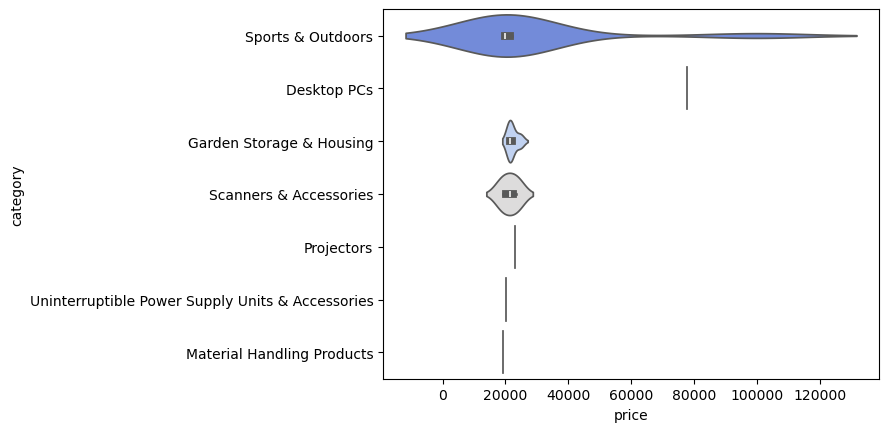

In [98]:
sns.violinplot(data=topitopi, x='price', y="category",palette="coolwarm")
plt.show()

Which product category tends to have the highest median price? Don't filter here by top categories.

In [102]:
topitopi.max(axis=0)

asin                                                        B0CJSNFYVM
title                YXHUI Kids Girls Figure Skating Dress Long Sle...
stars                                                              4.3
reviews                                                            279
price                                                         100000.0
isBestSeller                                                     False
boughtInLastMonth                                                    0
category              Uninterruptible Power Supply Units & Accessories
dtype: object

## 2. Bar Charts

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

In [152]:
topitopi = exp.nlargest(10, 'price')
topitopi

,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
uid,,,,,,,,
2259336,B091F5Y3CT,HB FBA Test Treadmill,0.0,0,100000.00,False,0,Sports & Outdoors
2235317,B0CDVKNBRV,Générique L.A 350° - I5 11400F - RTX 3050 8G -...,0.0,0,77752.00,False,0,Desktop PCs
2136904,B0CJSNFYVM,Abaodam decor christmas ornaments Desk Ornamen...,0.0,0,24674.59,False,0,Garden Storage & Housing
1551117,B0CHT331TN,BM4445-FI1-01200R10-03-E03 Driver,0.0,0,23482.73,False,0,Scanners & Accessories
340285,B0CHYG6MNW,HEDUSA Halloween 3D Holographic Fan 3D Hologra...,0.0,0,22933.42,False,0,Projectors
1651376,B08M36F6S2,YXHUI Kids Girls Figure Skating Dress Long Sle...,0.0,0,21999.00,False,0,Sports & Outdoors
1651377,B08M31N65K,YXHUI Kids Girls Figure Skating Dress Long Sle...,0.0,0,21999.00,False,0,Sports & Outdoors
2138945,B0C8MWJRSH,Outdoor Furniture Wood Porch Swing Black Brown...,0.0,0,21464.82,False,0,Garden Storage & Housing
2138946,B0C8MVQB8R,Outdoor Furniture Wood Porch Swing Black Brown...,0.0,0,21464.82,False,0,Garden Storage & Housing


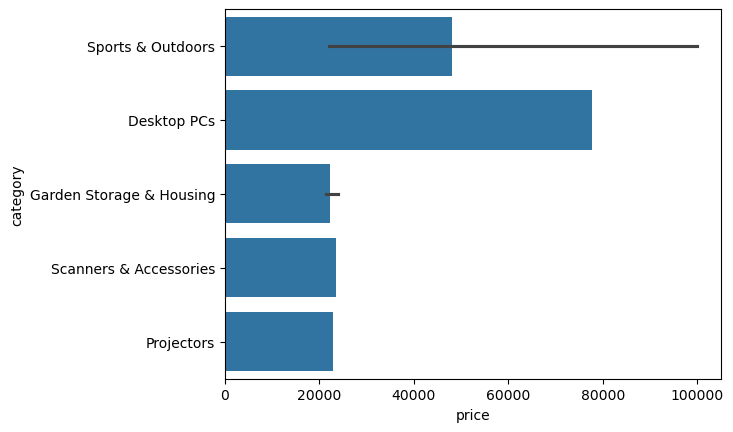

In [158]:
sns.barplot(data=topitopi, x="price", y="category")
plt.show()

Which product category tends to have the highest average price? Don't filter here by top categories.

Desktop PCs has the highest average price.

## 3. Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots

In [179]:
exp = exp[exp['stars']!= 0.0]

In [187]:
exp_10 = exp[exp['category'].isin(topitopi['category'])]

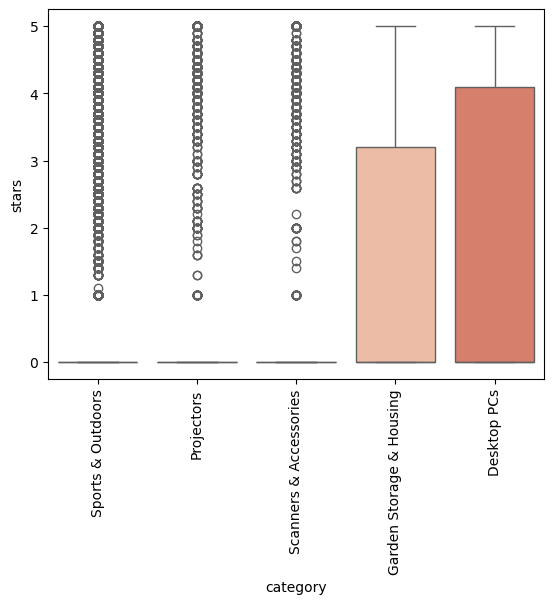

In [189]:
sns.boxplot(data=exp_10, x="category", y="stars", palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [202]:
exp.groupby('category')['stars'].median().reset_index().nlargest(10, 'stars')

,category,stars
56,Computer Memory,4.7
25,"Beer, Wine & Spirits",4.6
36,Building & Construction Toys,4.6
39,CPUs,4.6
132,Hobbies,4.6
157,Kids' Play Figures,4.6
164,Laptop Accessories,4.6
174,Luxury Food & Drink,4.6
209,Office Paper Products,4.6
2,Abrasive & Finishing Products,4.5


computer memory has recived the highest median rating from customers.

# Part 3: Investigating the Interplay Between Product Prices and Ratings

In [105]:
# Objective: Analyze how product ratings (stars) correlate with product prices.

## 1. Correlation Coefficients:

Calculate the correlation coefficient between price and stars.

In [109]:
corre = df.copy()

In [111]:
e = corre[['price','stars']]

In [113]:
e.head()

,price,stars
uid,,
1,21.99,4.7
2,23.99,4.7
3,21.99,4.7
4,31.99,4.7
5,17.99,4.6


In [115]:
e.corr().round(2)

,price,stars
price,1.00,-0.12
stars,-0.12,1.00


Is there a significant correlation between product price and its rating?

NO

## 2. Visualizations

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

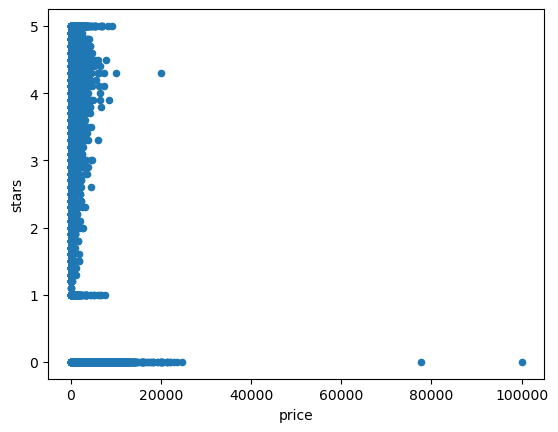

In [121]:
corre.plot(kind='scatter', x= 'price', y='stars')
plt.show()

Patterns Observed:

Outliers: lower rattings and high price items.

Data Concentration: Most of the star ratings are concentrated at the lower price range between approximately 0 and 10000 prices point.

#### Use a correlation heatmap to visualize correlations between all numerical variables.

In [124]:
corre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2443651 entries, 1 to 2828593
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   stars              float64
 3   reviews            int64  
 4   price              float64
 5   isBestSeller       bool   
 6   boughtInLastMonth  int64  
 7   category           object 
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 151.5+ MB


In [125]:
num = corre[['reviews','boughtInLastMonth','price','stars']]
num

,reviews,boughtInLastMonth,price,stars
uid,,,,
1,15308,0,21.99,4.7
2,98099,0,23.99,4.7
3,15308,0,21.99,4.7
4,7205,0,31.99,4.7
5,1881,0,17.99,4.6
...,...,...,...,...
2828589,0,0,22.34,0.0
2828590,0,0,97.99,0.0
2828591,0,0,52.99,0.0


In [126]:
co = num.corr()

In [127]:
co

,reviews,boughtInLastMonth,price,stars
reviews,1.000000,0.104043,-0.013171,0.085808
boughtInLastMonth,0.104043,1.000000,-0.023439,0.112536
price,-0.013171,-0.023439,1.000000,-0.124907
stars,0.085808,0.112536,-0.124907,1.000000


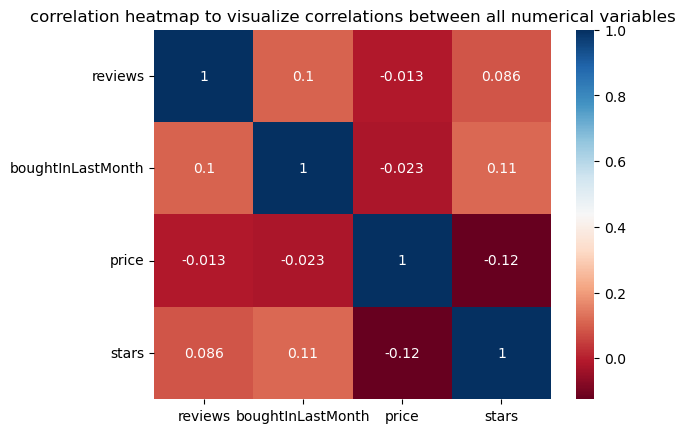

In [128]:
sns.heatmap(co, annot=True, cmap="RdBu")
plt.title("correlation heatmap to visualize correlations between all numerical variables")
plt.show()

Examine if product prices typically follow a normal distribution using a QQ plot

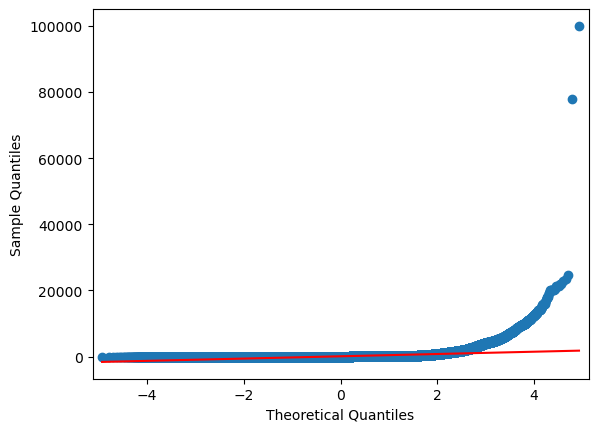

In [130]:
import statsmodels.api as sm
sm.qqplot(corre['price'], line='s');
plt.show()